<hr></hr>

<h1><center>An Empirical Analysis of Supervised Learning Algorithms</center></h1>
 

**Natapong Stephen Jarrell <br>
A14929717 <br>
COGS 118A**


#### Abstract
<blockquote>When given historical data, Supervised Learning algorithms can achieve very promising predictive ability. This is a result of advances in computing power, computing efficiency, data collection, and algorithmic efficiency over the last few decades. There have been more improvements than just efficiency; new machine learning algorithms are constantly researched, with some potentially rivaling previous leading algorithms through their high performance abilities. Using modern practices of feature scaling / data normalization and nested cross validation, I study the performance of the modern Random Forest classification (2001) algorithm compared to  older Machine Learning classifiers, such as Logistic Regression (1958) and K-Nearest Neighbors classification. The  sucess of these models is assessed by their efficacy on binary classification tasks across datasets.</blockquote>

 <hr>


### 1. Introduction
This comparison presents the results of an empircal comparison of 3 supervised learning algorithms using accuracy as the performance metric criteria. In this study, I examine the performance of Random Forest, Logistic Regression, and K-Nearest Neighbors Classifiers on a binary classification task using the Adult, Letter Recognition and Cover Type datasets, respectively. I ensure a diverse approach by utilizing datasets with varying dimensionality from the UCI Machine Learning Repository. This study is based upon the Cornell Univerisity paper 'An Empirical Comparison of Supervised Learning Algorithms' by Rich Caruana and Alexandri Niculescu-Mizil at the Department of Computer Science. It is a small-scale execution of the empircal analysis using the scikit-learn machine learning library in Python. 

### 2. Methodology
**2.1 Learning Algorithms** <br>
I explore the space of parameters using Grid Search and Nested Cross Validation. This section summarizes the parameter grids established for each model.

**Logistic Regression (Logistic)**: <br> I train unregularized and regularized models, varying between lasso and ridge regularization parameters by factors of $10$ from $10^{-8}$ and $10^{4}$.

**K-Nearest Neighbors**: <br>I use values 28 values of K from K= 1 to K= 487. I also use KNN with Euclidean distance and distance as the weight function used in prediction, so closer neighbors of a query point will have a greater influence than neighbors that are further away. Lastly, use p values of 1 and 2, where p = 1 is the manhattan distance (l1) and p = 2 is the euclidean distance (l2).

**Random Forest**: <br>I vary the number of trees by factors of $10$ from $10^1$ to $10^{10}$. I also vary the number of features to consider when looking for the best split in increments of 1, between 1 and 14.

Using a standard scaler, I scale the features of the data to 0 mean and 1 std. In total, I train 27 models with the best hyperparameters from our grid search.

**2.2 Performance Metrics**: <br>I are using accuracy as our performance metric to compare the performance between the optimals models on all 3 datasets.

**2.3 Data Sets**: <br>I compare the 3 algorithms on 3 binary classifiication tasks. ADULT, COVTYPE, and LETTER are from the UCI Repository. ADULT is binary, with <50k salary and >50k salary as the classes. COV_TYPE is made binary by dropping 5 cover types out of 7, keeping only Cover Type 1 and 2 for classification. Lastly, I convert LETTER to a binary classifcation task by mapping letters A through M as 0, and N - Z as 1. 

### 3.Experiment
**3.1 Approach** <br>
After cross validating the models to find optimal hyperparameters for each, the best models are trained with a random 5000 points and tested on 1000 points of data. The datasets are randomly sampled 3 times each, resulting in 3 trials per data, 3 models, and 3 data sets (27 total trials). I formalized the training task, saving the best algorithm performances and the grid search, decreasing the volume of data in RAM across iterations so that the model selection progress can run more efficiently.




**3.2 Statistical Significance**: <br>
When analyzing the mean test set performance of each algorithm/dataset combination, it is important to consider the statistical validatity of our model comparisons. Since I will be using the mean to capture the average performance, I will also employ paired t-tests to the best performing model to ensure that the models with a lower average performance are appropriated evaluated, relative to the t-statistic and p-values of our paired t tests. 
<br>
<br>
In the Results tables, the algorithm with the best performance metric (accuracy) will be **boldfaced**. Other algorithms whose performance is not stastically distinguishable from the best algorithm (p > 0.05) across the 3 trials for each dataset will have an asterisk (*****) next to its metric. 


**3.3 Primary Results**: <br>

The Random Forest Classifier emerged as the optimal model for this binary classification task on all 3 datasets.  While the KNN Classifier performed has a higher mean test accuracy on the LETTER dataset, the difference between that and the mean performance of the Random Forest Classifier is just slightly beyond statistical significance (p = 0.051).



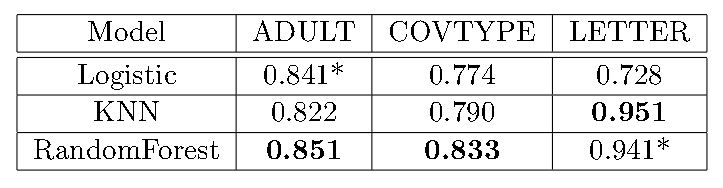


*Table 2*: *Mean Test Set Performance for Each Algorithm*
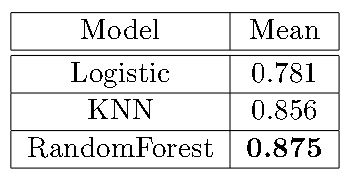




Across datasets the mean test accuracy of the Logistic Regression is quite poor relative to the Random Forest model. The poor performance of the Logistic Regression on the COVTYPE and LETTER data set is likely a result of a few factors:
* LR can not learn non linear decision boundaries. LR's high bias means it is not flexible enough to learn highly non-linear decision boundaries.
* LR's requires little to no multicollinearity of independent variables.
* LR assumes linearity of independent variables.

However, the Logistic Regression model performed well on the ADULT data set, with a paired t-test revealing that the difference between its mean accuracy and the mean accuracy of the Random Forest model is not statistically significant. This is likely a result of the linear continuous independent variables in the ADULT data set, which the COVTYPE and LETTER data set lacked. It is imporant to note that the Logistic Regression classifier does have its benefits:
* LR requires less computation than KNN and RF
* LR is highly interpretable
* LR does not require as much hyperparameter tuning, only for regularization
* Less chance of overfitting

While the Random Forest Classifier has superior classification performance, it has drawbacks:
* Lacks interpretability when compared to LR
* High computational complexity and model complexity

The Random Forest also does not handle large numbers or irrelevant features very well. This is remedied by our intensive grid search and nested cross validation, which allowed us to select the optimal number of features and indirectly elimate unnecessary features that may have impacted performance.


The KNN classifier performed well on the LETTER data set becaues KNN determines neighborhoods to find similar examples, a task which is well suited for the pixelwise comparison of discrete letters. The nature of the alphabet is much different than the nature of salary or cover type, the binary tasks for the other data sets, in that there are clear groups in which the data must lie. 





**3.4 Secondary Results**: <br>
Typically, models that perform with 100% accuracy on the training data generalize poorly to new data. 


*Table 3*: *Showing the Mean Training Set Performance of Optimal Hyperparameters for Each Data Set / Algorithm Combination*
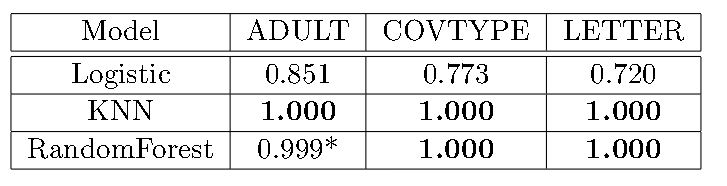


However, the test performance of Random Forests and KNNs do not decrease as a result of the 100% accuracy on training data. For example, the nature of a KNN classifier is that new data points are compared to the true class of training points based on "neighborhoods" established by the value of the hyperparameter *k*. Therefore, a KNN will always have a 100% training accuracy on the training data. It is important to note, however, that as a result of their construction, KNNs and Random Forests are very dependent on data that is representative of the real world distribution (good data). 




*Table 4*: *An Appendix Table with Raw Test Scores* 
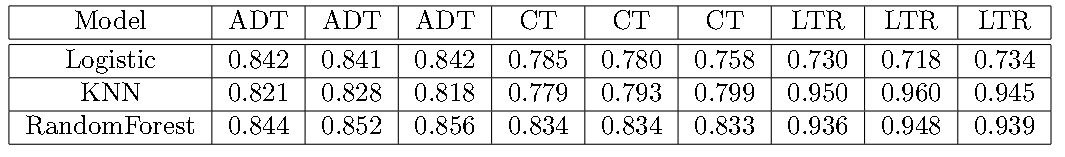


Below are appendix tables of the p-values from paired t-tests that revealed the statistical significance of model accuracies on the training and test set. Null values occur for the training set errors of the KNN and Random Forest because the accuracies are approximately the same.

*Table 5*: *An Appendix Table Of the Algorithm's Mean Testing Accuracy Paired T-Test P-Values* 
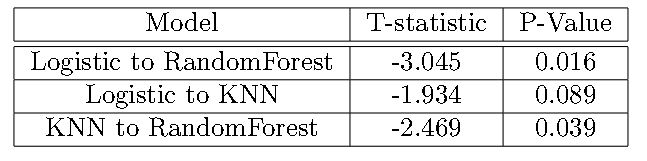


*Table 6*: *An Appendix Table Of the Training Accuracy Paired T-Test P-Values Across Data Set / Algorithm Combinations* 
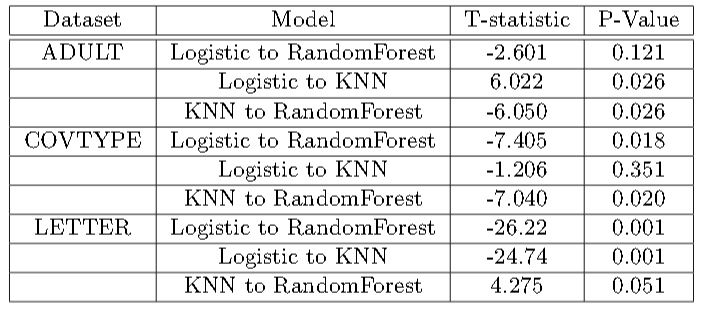


*Table 7*: *An Appendix Table Of the Training Accuracy Paired T-Test P-Values Across Data Set / Algorithm Combinations* 
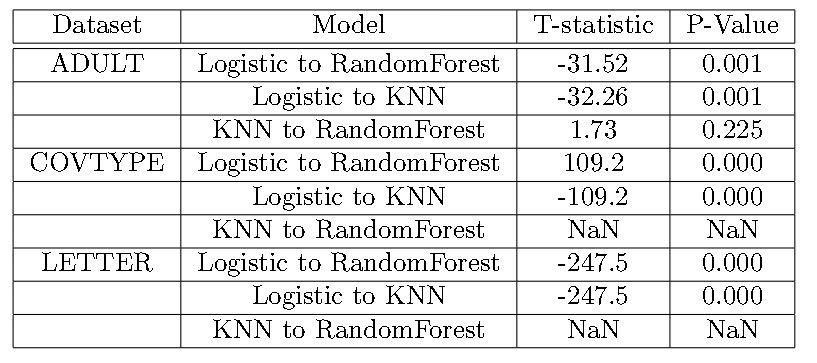



### 4. Conclusion
In this study, I conducted an empirical analysis of Logistic Regression, K-Nearest Neighbors classifiers, and Random Forest classifiers on a binary classification task. Given more time, it would be interesting to investigate the performance of these models on smaller training samples. The data sets implored revealed defining characteristics of each of the supervised learning classifiers: Logistic Regression performs best on linear continuous data, K-Nearest Neighbors on classification tasks with discrete groups such as alphabetic letters, and Random Forest across data sets due to the high complexity and robustness to outliers. The Random Forest model has better accuracy than other classifcation algorithms, but there is still scenarios in which employing a Logistic Regression and KNN would be preferable. 

### References
Caruana R., Niculescu-Mizil A. (2006) An Empirical Comparison of Supervised Learning Algorithms

Blake, C., & Merz, C. (1998). UCI repository of machine learning databases.

SciKit Learn (2020, December 10). Supervised Learning. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning


###  Data Processing

 Load and One-Hot Encode 3 Datasets

#### Adult Dataset

In [1]:
import pandas as pd

adult_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'martial-status', 'occupation',
    'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income > 50k']
adult = pd.read_csv('adult.data', names = adult_columns, index_col = None)
assert adult.isnull().any(axis=1).unique()[0] == False
adult = pd.get_dummies(adult, columns = ['workclass', 'education', 'martial-status', 'occupation',
    'relationship', 'race', 'sex',
    'native-country'])
adult.head()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,income > 50k,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
adult['income > 50k'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [3]:
adult_dict = {' >50K': 0, ' <=50K': 1}
adult['income > 50k'] = adult['income > 50k'].map(adult_dict)

adult_X = adult[adult.columns.difference(['income > 50k'])]
adult_y = adult['income > 50k']

In [4]:
adult.head()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,income > 50k,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Cover Type Dataset

In [5]:
covtype_columns = ['Elevation' , 'Aspect' , 'Slope' , 'Horizontal_Distance_To_Hydrology' ,
    'Vertical_Distance_To_Hydrology' , 'Horizontal_Distance_To_Roadways' ,
    'Hillshade_9am' , 'Hillshade_Noon' , 'Hillshade_3pm' , 'Horizontal_Distance_To_Fire_Points' ,
    'Wilderness_Area0' ,'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3']
for i in range(40):
    covtype_columns.append('Soil_Type' + str(i))
covtype_columns.append('Cover_Type')
covtype = pd.read_csv('covtype.data', names = covtype_columns)
assert covtype.isnull().any(axis=1).unique()[0] == False
covtype.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
covtype['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [7]:
covtype = covtype.drop(covtype.loc[covtype['Cover_Type'] > 2].index)

In [8]:
covtype['Cover_Type'].unique()

array([2, 1], dtype=int64)

In [9]:
covtype_X = covtype[covtype.columns.difference(['Cover_Type'])]
covtype_y = covtype['Cover_Type']

#### Letter Recognition Dataset

In [10]:
letter_columns = ["lettr","xbox","ybox","width","high","onpix","x-bar","y-bar","x2bar","y2bar",
     "xybar", "x2ybr", "xy2br", "x-ege", "xegvy",  "y-ege","yegvx"]
letters = pd.read_csv('letter-recognition.data', names = letter_columns)
assert letters.isnull().any(axis=1).unique()[0] == False
letters.head()

,lettr,xbox,ybox,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [11]:
letter_dict = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0,'N':1,'O':1,'P':1,'Q':1,'R':1,'S':1,'T':1,'U':1,'V':1,'W':1,'X':1,'Y':1,'Z':1}

letters['lettr'] = letters['lettr'].map(letter_dict)

letters_X = letters[letters.columns.difference(['lettr'])]
letters_y = letters['lettr']

### Steps
##### For each dataset:
1. Pick 3 models: Random Forest Classifier, KNN, and Logistic Regression
2. Randomly Sample 5000 Data Points 
3. Model Selection: K-fold = 5 CV to tune hyperparams and select the best model
4. Repeat the random sampling and model selection 2 more times

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.externals import joblib
import warnings
# removing warnings
warnings.filterwarnings('ignore')


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Model Selection

#### Save the Train and Test Accuracy of Optimal Models and Grid Search Objects
I formalized the training task, saving the best algorithm and the entire cross validation scores of the grid search so that the model selection progress could run efficiently by decreasing the volume of data in RAM across iterations.

In [15]:
def model_selection(X_data, Y_data, i = 0):
    X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,
                                                        random_state=12345 + i, #Added i to increment the random state                                                                          
                                                        stratify=Y_data,        #across dataset trials
                                                       train_size = 5000,
                                                       test_size = 1250)        #0.8 Train 0.2 Test

    # Initializing Classifiers
    clf1 = LogisticRegression(random_state=12345)
    clf2 = KNeighborsClassifier(algorithm='ball_tree',
                                leaf_size=50)
    clf3 = RandomForestClassifier(random_state=12345)

    # Building the pipelines
    pipe1 = Pipeline([('std', StandardScaler()),
                      ('classifier', clf1)])

    pipe2 = Pipeline([('std', StandardScaler()),
                      ('classifier', clf2)])

    pipe3 = Pipeline([('std', StandardScaler()),
                      ('classifier', clf3)])


    # Setting up the parameter grids
    param_grid1 = [{'classifier__penalty': ['l1','l2'],
                    'classifier__C': np.power(10., np.arange(-8, 4))}]

    param_grid2 = [{'classifier__n_neighbors': [ i for i in range(1,500,18)],
                    'classifier__p': [1, 2],
                   'classifier__metric': ['euclidean'],
                   'classifier__weights': ['distance']}]

    param_grid3 = [{'classifier__n_estimators': [i*10 for i in range(1,11)],
                     'classifier__max_features': [i for i in range(1,15)]}]


    # Setting up multiple GridSearchCV objects, 1 for each algorithm
    gridcvs = {}
    for pgrid, est, name in zip((param_grid1, param_grid2, param_grid3),(pipe1, pipe2, pipe3), ('Logistic', 'KNN', 'RandomForest')):
        gcv = GridSearchCV(estimator=est,
                           param_grid=pgrid,
                           scoring='accuracy',
                           n_jobs=6, # increased jobs to decrease computing time
                           cv=5, # 5-fold inner loop
                           verbose=0,
                           refit=True)
        gridcvs[name] = gcv
    
    cv_scores = {name: [] for name, gs_est in gridcvs.items()}

    skfold = StratifiedKFold( n_splits=5, shuffle=True, random_state=1)

    # The outer loop for algorithm selection
    c = 1
    for outer_train_idx, outer_valid_idx in skfold.split(X_train,y_train):
        for name, gs_est in sorted(gridcvs.items()):
            print('outer fold %d/5 | tuning %-8s' % (c, name), end='')

            # The inner loop for hyperparameter tuning
            gs_est.fit(X_train.iloc[outer_train_idx], y_train.iloc[outer_train_idx])
            y_pred = gs_est.predict(X_train.iloc[outer_valid_idx])
            acc = accuracy_score(y_true=y_train.iloc[outer_valid_idx], y_pred=y_pred)
            print(' | inner ACC %.2f%% | outer ACC %.2f%%' %
                  (gs_est.best_score_ * 100, acc * 100))
            cv_scores[name].append(acc)

        c += 1


    # Looking at the results
    results = []
    for name in cv_scores:
        print('%-8s | outer CV acc. %.2f%% +\- %.3f' % (
              name, 100 * np.mean(cv_scores[name]), 100 * np.std(cv_scores[name])))
        results.append([np.mean(cv_scores[name]), name])
    print()
    
    
    training_accuracies = []
    testing_accuracies = []
    for name in cv_scores:
        print('{} best parameters'.format(name), gridcvs[name].best_params_)
    
        best_algo = gridcvs[name]   # Automatically Select the Best Algorithm

        best_algo.fit(X_train, y_train)
        train_acc = accuracy_score(y_true=y_train, y_pred=best_algo.predict(X_train))
        test_acc = accuracy_score(y_true=y_test, y_pred=best_algo.predict(X_test))

        print('Accuracy %.2f%% (average over CV test folds)' %
              (100 * best_algo.best_score_))
        print('Best Parameters: %s' %gridcvs[name].best_params_)
        print('Training Accuracy: %.2f%%' % (100 * train_acc))
        print('Test Accuracy: %.2f%%' % (100 * test_acc))
        training_accuracies.append(train_acc)
        testing_accuracies.append(test_acc)
    return gridcvs, [training_accuracies,testing_accuracies]          #Return cross validation scores and gridsearch object

#### Function for Saving Performance Metrics

In [16]:
import json
from sklearn.externals import joblib
import pickle

def save_algo_and_scores(scores, name, iteration):
    
    joblib.dump(scores[0], 'gridcvs/' + str(name) + str(iteration) + '.pkl')
    
    with open('accuracy/' + str(name) + str(iteration) + '.txt', 'wb') as fp:
        pickle.dump(scores[1], fp)


In [17]:
X = [[adult_X, 'adult'], 
     [covtype_X, 'covtype'], [letters_X,'letters']]
y = [adult_y, covtype_y, letters_y]

In [18]:
%%time
for x_data, y_data in zip(X,y):
    for i in range(3):
        scores = model_selection(x_data[0], y_data, i)
        output = save_algo_and_scores(scores, x_data[1], i)

outer fold 1/5 | tuning KNN      | inner ACC 82.75% | outer ACC 80.92%
outer fold 1/5 | tuning Logistic | inner ACC 84.07% | outer ACC 83.92%
outer fold 1/5 | tuning RandomForest | inner ACC 84.27% | outer ACC 83.32%
outer fold 2/5 | tuning KNN      | inner ACC 82.60% | outer ACC 83.20%
outer fold 2/5 | tuning Logistic | inner ACC 83.67% | outer ACC 85.80%
outer fold 2/5 | tuning RandomForest | inner ACC 83.73% | outer ACC 85.00%
outer fold 3/5 | tuning KNN      | inner ACC 83.23% | outer ACC 81.40%
outer fold 3/5 | tuning Logistic | inner ACC 84.38% | outer ACC 81.60%
outer fold 3/5 | tuning RandomForest | inner ACC 84.15% | outer ACC 82.80%
outer fold 4/5 | tuning KNN      | inner ACC 82.90% | outer ACC 82.40%
outer fold 4/5 | tuning Logistic | inner ACC 84.20% | outer ACC 83.80%
outer fold 4/5 | tuning RandomForest | inner ACC 84.45% | outer ACC 85.40%
outer fold 5/5 | tuning KNN      | inner ACC 82.58% | outer ACC 83.78%
outer fold 5/5 | tuning Logistic | inner ACC 83.93% | outer A

Accuracy 82.58% (average over CV test folds)
Best Parameters: {'classifier__max_features': 4, 'classifier__n_estimators': 90}
Training Accuracy: 100.00%
Test Accuracy: 83.36%
outer fold 1/5 | tuning KNN      | inner ACC 78.29% | outer ACC 75.72%
outer fold 1/5 | tuning Logistic | inner ACC 77.27% | outer ACC 77.02%
outer fold 1/5 | tuning RandomForest | inner ACC 81.87% | outer ACC 81.32%
outer fold 2/5 | tuning KNN      | inner ACC 78.08% | outer ACC 77.10%
outer fold 2/5 | tuning Logistic | inner ACC 77.65% | outer ACC 75.30%
outer fold 2/5 | tuning RandomForest | inner ACC 82.08% | outer ACC 81.50%
outer fold 3/5 | tuning KNN      | inner ACC 78.17% | outer ACC 79.00%
outer fold 3/5 | tuning Logistic | inner ACC 76.98% | outer ACC 78.90%
outer fold 3/5 | tuning RandomForest | inner ACC 81.47% | outer ACC 82.40%
outer fold 4/5 | tuning KNN      | inner ACC 77.70% | outer ACC 80.00%
outer fold 4/5 | tuning Logistic | inner ACC 77.00% | outer ACC 77.90%
outer fold 4/5 | tuning RandomFo

Accuracy 94.02% (average over CV test folds)
Best Parameters: {'classifier__max_features': 5, 'classifier__n_estimators': 80}
Training Accuracy: 100.00%
Test Accuracy: 94.80%
outer fold 1/5 | tuning KNN      | inner ACC 93.88% | outer ACC 94.50%
outer fold 1/5 | tuning Logistic | inner ACC 71.08% | outer ACC 74.30%
outer fold 1/5 | tuning RandomForest | inner ACC 93.17% | outer ACC 94.50%
outer fold 2/5 | tuning KNN      | inner ACC 93.90% | outer ACC 93.90%
outer fold 2/5 | tuning Logistic | inner ACC 72.22% | outer ACC 68.60%
outer fold 2/5 | tuning RandomForest | inner ACC 93.47% | outer ACC 93.20%
outer fold 3/5 | tuning KNN      | inner ACC 93.83% | outer ACC 95.60%
outer fold 3/5 | tuning Logistic | inner ACC 72.30% | outer ACC 69.20%
outer fold 3/5 | tuning RandomForest | inner ACC 92.88% | outer ACC 94.00%
outer fold 4/5 | tuning KNN      | inner ACC 93.85% | outer ACC 94.60%
outer fold 4/5 | tuning Logistic | inner ACC 71.40% | outer ACC 72.90%
outer fold 4/5 | tuning RandomFo

## Displaying Results

We load the model accuracies and grid search objects we saved in our automatic model selection.

In [23]:
import os 

def load_algos_and_scores():
    gridsearches = []
    for item in os.listdir('gridcvs'):
        gridsearches.append(joblib.load(os.path.join('gridcvs',item)))
    
    accuracies = []
    for item in os.listdir('accuracy'):
        with open(os.path.join('accuracy', item), 'rb') as fp:
            accuracies.append(pickle.load(fp))
                            
    return gridsearches, accuracies

Process the data into structures we can manipulate easily.

In [32]:
grids, accs =load_algos_and_scores()
train = [i[0] for i in accs] 
test = [i[1] for i in accs] 

test_dict = {'Logistic': [], 'KNN': [], 'RandomForest': []}

for item in test:
    for i, accuracy in enumerate(item):
        if i == 0:
            test_dict['Logistic'].append(accuracy)
        elif i == 1:
            test_dict['KNN'].append(accuracy)
        elif i == 2:
            test_dict['RandomForest'].append(accuracy)
            
train_dict = {'Logistic': [], 'KNN': [], 'RandomForest': []}

for item in train:
    for i, accuracy in enumerate(item):
        if i == 0:
            train_dict['Logistic'].append(accuracy)
        elif i == 1:
            train_dict['KNN'].append(accuracy)
        elif i == 2:
            train_dict['RandomForest'].append(accuracy)            

### Primary Results

#### Primary Results: Mean Test Set Performance for Each Algorithm
A table of mean (across 3 trials) test set performance for each algorithm/dataset combination.

In [57]:
test_df = pd.DataFrame(test_dict)
adult = test_df.iloc[0:3]
covtype = test_df.iloc[3:6]
letters = test_df.iloc[6:9]
primary = pd.DataFrame([adult.mean(), covtype.mean(), letters.mean()])
primary.index = ['ADULT', 'COVTYPE', 'LETTER']
results_1 = primary.transpose()
results_1.to_csv("primary_1.csv")
results_1

,ADULT,COVTYPE,LETTER
Logistic,0.841333,0.773867,0.727733
KNN,0.822400,0.790400,0.951200
RandomForest,0.850667,0.833333,0.941067


In [58]:
test_df

,Logistic,KNN,RandomForest
0,0.8416,0.8208,0.8440
1,0.8408,0.8280,0.8520
2,0.8416,0.8184,0.8560
3,0.7848,0.7792,0.8336
4,0.7792,0.7928,0.8336
5,0.7576,0.7992,0.8328
6,0.7304,0.9496,0.9360
7,0.7184,0.9592,0.9480
8,0.7344,0.9448,0.9392


#### Primary Results: Mean Test Performance for Each Algorithm
A table of mean (across 3 trials) test set performance for each algorithm.

In [50]:
results_2 = pd.DataFrame(results_1.mean(axis = 1), columns = ['Accuracy'])
results_2.to_csv('primary_2.csv')
results_2

,Accuracy
Logistic,0.780978
KNN,0.854667
RandomForest,0.875022


### Secondary Results

#### Secondary Results: Mean Training Set Performance of Optimal Models
A main matter table showing mean training set performance for the optimal
hyperparameters on each of the dataset/algorithm combinations.

In [59]:
train_df = pd.DataFrame(train_dict)
train_adult = train_df.iloc[0:3]
train_covtype = train_df.iloc[3:6]
train_letters = train_df.iloc[6:9]
secondary = pd.DataFrame([train_adult.mean(), train_covtype.mean(), 
                          train_letters.mean()])
secondary.index = ['ADULT', 'COVTYPE', 'LETTER']
secondary_results = secondary.transpose()
secondary_results.to_csv("secondary_1.csv")
secondary_results

,ADULT,COVTYPE,LETTER
Logistic,0.8514,0.7726,0.719533
KNN,1.0000,1.0000,1.000000
RandomForest,0.9998,1.0000,1.000000


#### Secondary Results: Raw Test Set Scores
An appendix table with raw test set scores, not just the mean scores of the table.

In [52]:
secondary_2 = pd.DataFrame(test_dict).transpose()
secondary_2.columns = ['ADULT', 'ADULT', 'ADULT',
                      'COVTYPE', 'COVTYPE', 'COVTYPE',
                      'LETTER', 'LETTER', 'LETTER']
secondary_2.to_csv("secondary_2.csv")

In [53]:
secondary_2

,ADULT,ADULT,ADULT,COVTYPE,COVTYPE,COVTYPE,LETTER,LETTER,LETTER
Logistic,0.8416,0.8408,0.8416,0.7848,0.7792,0.7576,0.7304,0.7184,0.7344
KNN,0.8208,0.8280,0.8184,0.7792,0.7928,0.7992,0.9496,0.9592,0.9448
RandomForest,0.8440,0.8520,0.8560,0.8336,0.8336,0.8328,0.9360,0.9480,0.9392


## T-Tests with P-Values

In [79]:
from scipy.stats import ttest_rel

test_dict

{'Logistic': [0.8416,
  0.8408,
  0.8416,
  0.7848,
  0.7792,
  0.7576,
  0.7304,
  0.7184,
  0.7344],
 'KNN': [0.8208,
  0.828,
  0.8184,
  0.7792,
  0.7928,
  0.7992,
  0.9496,
  0.9592,
  0.9448],
 'RandomForest': [0.844,
  0.852,
  0.856,
  0.8336,
  0.8336,
  0.8328,
  0.936,
  0.948,
  0.9392]}

### Mean Testing Accuracy T-Test

##### Adult

In [77]:
t_primary_1 = pd.DataFrame([ttest_rel(test_dict["Logistic"][:3], test_dict["RandomForest"][:3]),
                                   ttest_rel(test_dict["Logistic"][:3], test_dict["KNN"][:3]),
                                            ttest_rel(test_dict["KNN"][:3], test_dict["RandomForest"][:3])],
                          index = ['Logistic to RandomForest', 'Logistic to KNN', 'KNN to RandomForest'])
t_primary_1

,statistic,pvalue
Logistic to RandomForest,-2.601530,0.121424
Logistic to KNN,6.022141,0.026483
KNN to RandomForest,-6.049740,0.026252


#### CovType

In [78]:
t_primary_1 = pd.DataFrame([ttest_rel(test_dict["Logistic"][3:6], test_dict["RandomForest"][3:6]),
                                   ttest_rel(test_dict["Logistic"][3:6], test_dict["KNN"][3:6]),
                                            ttest_rel(test_dict["KNN"][3:6], test_dict["RandomForest"][3:6])],
                          index = ['Logistic to RandomForest', 'Logistic to KNN', 'KNN to RandomForest'])
t_primary_1

,statistic,pvalue
Logistic to RandomForest,-7.404593,0.017755
Logistic to KNN,-1.206445,0.350990
KNN to RandomForest,-7.040038,0.019586


#### Letters

In [80]:
t_primary_1 = pd.DataFrame([ttest_rel(test_dict["Logistic"][6:9], test_dict["RandomForest"][6:9]),
                                   ttest_rel(test_dict["Logistic"][6:9], test_dict["KNN"][6:9]),
                                            ttest_rel(test_dict["KNN"][6:9], test_dict["RandomForest"][6:9])],
                          index = ['Logistic to RandomForest', 'Logistic to KNN', 'KNN to RandomForest'])
t_primary_1

,statistic,pvalue
Logistic to RandomForest,-26.218941,0.001452
Logistic to KNN,-24.743567,0.001629
KNN to RandomForest,4.275334,0.050593


#### Mean Accuracy T-Test of Means

In [99]:
t_primary_1 = pd.DataFrame([ttest_rel(test_dict["Logistic"], test_dict["RandomForest"]),
                                   ttest_rel(test_dict["Logistic"], test_dict["KNN"]),
                                            ttest_rel(test_dict["KNN"], test_dict["RandomForest"])],
                          index = ['Logistic to RandomForest', 'Logistic to KNN', 'KNN to RandomForest'])
t_primary_1

,statistic,pvalue
Logistic to RandomForest,-3.045295,0.015935
Logistic to KNN,-1.934123,0.089152
KNN to RandomForest,-2.469083,0.038766


### Mean Training Values T-Test

In [100]:
train_dict

{'Logistic': [0.8464,
  0.8606,
  0.8472,
  0.7756,
  0.7736,
  0.7686,
  0.7218,
  0.7184,
  0.7184],
 'KNN': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'RandomForest': [1.0, 0.9996, 0.9998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

#### Adult

In [104]:
t_primary_1 = pd.DataFrame([ttest_rel(train_dict["Logistic"][:3], train_dict["RandomForest"][:3]),
                                   ttest_rel(train_dict["Logistic"][:3], train_dict["KNN"][:3]),
                                            ttest_rel(train_dict["KNN"][:3], train_dict["RandomForest"][:3])],
                          index = ['Logistic to RandomForest', 'Logistic to KNN', 'KNN to RandomForest'])
t_primary_1

,statistic,pvalue
Logistic to RandomForest,-31.515080,0.001005
Logistic to KNN,-32.263713,0.000959
KNN to RandomForest,1.732051,0.225403


#### CovType

In [105]:
t_primary_1 = pd.DataFrame([ttest_rel(train_dict["Logistic"][3:6], train_dict["RandomForest"][3:6]),
                                   ttest_rel(train_dict["Logistic"][3:6], train_dict["KNN"][3:6]),
                                            ttest_rel(train_dict["KNN"][3:6], train_dict["RandomForest"][3:6])],
                          index = ['Logistic to RandomForest', 'Logistic to KNN', 'KNN to RandomForest'])
t_primary_1

,statistic,pvalue
Logistic to RandomForest,-109.239427,0.000084
Logistic to KNN,-109.239427,0.000084
KNN to RandomForest,NaN,NaN


#### Letters

In [106]:
t_primary_1 = pd.DataFrame([ttest_rel(train_dict["Logistic"][6:9], train_dict["RandomForest"][6:9]),
                                   ttest_rel(train_dict["Logistic"][6:9], train_dict["KNN"][6:9]),
                                            ttest_rel(train_dict["KNN"][6:9], train_dict["RandomForest"][6:9])],
                          index = ['Logistic to RandomForest', 'Logistic to KNN', 'KNN to RandomForest'])
t_primary_1

,statistic,pvalue
Logistic to RandomForest,-247.470588,0.000016
Logistic to KNN,-247.470588,0.000016
KNN to RandomForest,NaN,NaN
